In [ ]:
from google.colab import files
uploaded = files.upload()


Saving advertising_vs_sales.xlsx to advertising_vs_sales.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel("advertising_vs_sales.xlsx")
df.head()



,TV_Advertising,Radio_Advertising,SocialMedia_Advertising,Sales
0,25795,42819,11890,498064
1,10860,44188,49606,685283
2,86820,22568,38740,660337
3,64886,24769,22502,400551
4,16265,33693,29777,682691


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Independent and dependent variables
X = df[["TV_Advertising", "Radio_Advertising", "SocialMedia_Advertising"]]
y = df["Sales"]

# Build the model
model = LinearRegression()
model.fit(X, y)

# Predict sales
df["Predicted_Sales"] = model.predict(X)

# Print model details
print("Intercept:", model.intercept_)
print("Coefficients:", model.coef_)
print("R² Score:", r2_score(y, df["Predicted_Sales"]))


Intercept: 524574.7174436415
Coefficients: [-0.84359912  3.66385649 -2.22332659]
R² Score: 0.25919461401017063


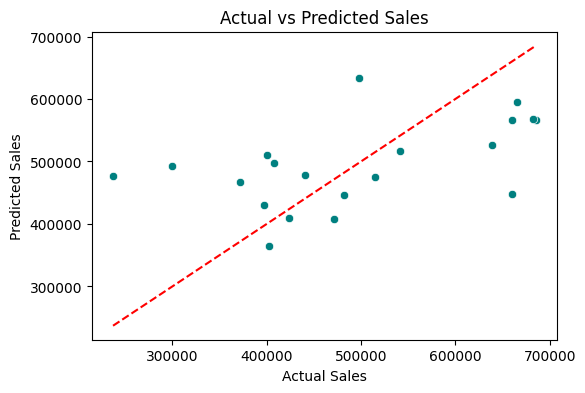

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(x=y, y=df["Predicted_Sales"], color="teal")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--")
plt.show()


Regression Summary:

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     133.3
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           5.63e-20
Time:                        08:29:49   Log-Likelihood:                -299.85
No. Observations:                 100   AIC:                             603.7
Df Residuals:                      98   BIC:                             608.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0064      0.92

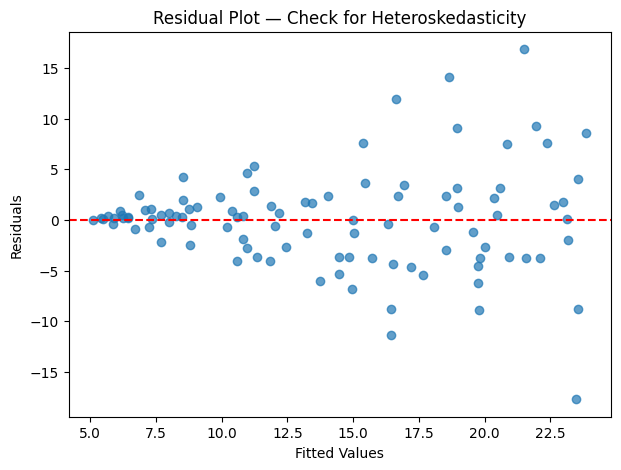


Breusch–Pagan Test Results:
{'Lagrange multiplier statistic': np.float64(16.80083608899433), 'p-value': np.float64(4.151500762695693e-05), 'f-value': np.float64(19.7896452238704), 'f p-value': np.float64(2.2856655601720233e-05)}

Model with Robust Standard Errors:

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.576
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     102.3
Date:                Wed, 05 Nov 2025   Prob (F-statistic):           6.91e-17
Time:                        08:29:49   Log-Likelihood:                -299.85
No. Observations:                 100   AIC:                             603.7
Df Residuals:                      98   BIC:                             608.9
Df Model:                           1                                         
Covariance Type:      

In [9]:
#q2
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Step 2: Create a simple dataset
np.random.seed(42)
X = np.random.rand(100) * 10
# Creating heteroskedastic errors (variance increases with X)
errors = np.random.randn(100) * X
Y = 5 + 2 * X + errors

data = pd.DataFrame({'X': X, 'Y': Y})

# Step 3: Fit a linear regression model
X_const = sm.add_constant(data['X'])
model = sm.OLS(data['Y'], X_const).fit()

print("Regression Summary:\n")
print(model.summary())

# Step 4: Plot residuals to visualize heteroskedasticity
plt.figure(figsize=(7, 5))
plt.scatter(model.fittedvalues, model.resid, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot — Check for Heteroskedasticity")
plt.show()

# Step 5: Breusch-Pagan test for heteroskedasticity
bp_test = het_breuschpagan(model.resid, X_const)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print("\nBreusch–Pagan Test Results:")
print(dict(zip(labels, bp_test)))

# Step 6: If heteroskedasticity detected, use robust standard errors
robust_model = model.get_robustcov_results(cov_type='HC3')
print("\nModel with Robust Standard Errors:\n")
print(robust_model.summary())
